**Name: Christ-Brian Amedjonekou**  
**Date: 03/18/2019**  
**PHYS 3600ID-D862 (Machine Learning) HW 4**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**


***I certify that my work is my own.***

#### Data description

The data we use for this worksheet are about stars. Our features are the so-called "colors", which give an indication of whether a star emits more blue, green, yellow, or red light. We are trying to predict whether a star is a special type of star called a RR-Lyrae variable star. So our target values will be yes/no (1/0 in the language of numpy arrays).

1\. Load the data for features and target from the appropriate files and save them as numpy arrays. 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cfm

In [6]:
lyraeSet = pd.read_excel('Datasets/RRLyrae_full.xlsx')
lyraeSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93141 entries, 0 to 93140
Data columns (total 5 columns):
Blue      93141 non-null float64
Green     93141 non-null float64
Yellow    93141 non-null float64
Red       93141 non-null float64
Target    93141 non-null int64
dtypes: float64(4), int64(1)
memory usage: 3.6 MB


In [5]:
lyraeSet.head(20)

,Blue,Green,Yellow,Red,Target
0,0.394000,1.250999,0.137000,0.061999,0
1,0.339001,1.048000,0.151999,0.023001,0
2,0.341999,1.008001,0.129000,0.203001,0
3,0.392000,0.965000,0.149000,0.150000,0
4,0.333000,1.040001,0.125999,0.101999,0
5,0.373999,1.154001,0.145000,0.121000,0
6,0.384001,0.965000,0.118999,0.011000,0
7,0.370998,1.015001,0.158001,0.091999,0
8,0.391001,1.003000,0.145000,0.074999,0
9,0.330000,0.948000,0.164000,0.021000,0


2\. Answer the following questions:

Is this a classification or regression problem?

* **Classification**

Is this supervised or unsupervised learning?

* **Supervised, target vector is present**

How many instances are in this data set? 

* $\mathbf{93141}$

How many features? What is their range?

* **4 features (colors: Blue, Green, Yellow, Red)**

How many RR Lyrae are in the data set? 

In [13]:
print('Amount of RR Lyrae Variable Stars: {}'.format(lyraeSet[lyraeSet['Target'] == 1].shape[0]))

Amount of RR Lyrae Variable Stars: 483


What would be the accuracy of a classifier that classifies all objects in the data set as non-RR Lyrae?

* **If '1' (RR Lyrae) is the negative class then accuracy = $0.5\%$**
    * I'm assuming for this to be the positive class
    
    
* **If '0' (Non-RR Lyrae) is the negative class then accuracy = $99.5\%$**

In [20]:
def accuracy_(positive_class= 1):
    amount = lyraeSet[lyraeSet['Target'] == positive_class].shape[0]
    total = lyraeSet['Target'].shape[0]
    return amount/total

In [21]:
# When 1 (RR Lyrae) is the positive class
accuracy_()

0.005185686217669985

In [24]:
# When 0 (Non-RR Lyrae) is the positive class
accuracy_(0) 

0.99481431378233

**Very Unbalanced: Non-Lyrae are most common it appears**

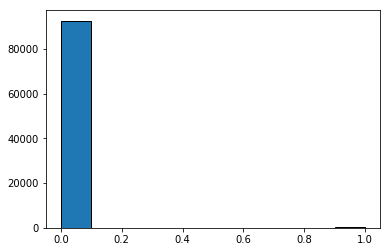

In [31]:
plt.hist(lyraeSet['Target'], edgecolor= 'k');

3\. Build a decision tree classifier for this data set, using an 80/20 train test split like last time. What is the performance on the test set?

In [38]:
# Creates the Model
lyraeModel = DTC()

# Since my Features and Targets are separated, 
# we'll create the train and test sets

Data = lyraeSet[['Blue', 'Green', 'Yellow', 'Red']]
Target = lyraeSet['Target']
xtrain, xtest, ytrain, ytest = tts(Data, Target, test_size= 0.2, 
                                   train_size= 0.8, random_state= 5)

# Now we'll fit the model with the training data
lyraeModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = lyraeModel.predict(xtest)

We can now implement the k-fold cross validation algorithm using the following syntax (note that this assumes that your algorithm is called 'model'):

http://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

In [ ]:
#Note: if you want to also save the predicted labels, you can do
    
from sklearn.model_selection import cross_val_predict

ypred = cross_val_predict(model, X, y, cv=5)

4\. Report the scores, and calculate the mean and standard deviation of the scores vector. 

5\. Calculate and plot the confusion matrix for your model (Note: you will need to copy/paste the "plot_confusion_matrix" function from one of the previous notebooks, and use the function cross_val_predict to get the predicted labels). 

6\. Based on the confusion matrix, how many true positive, true negative, false positive, false negative instances do you have?

7\. Based on the definitions given on the slides, calculate accuracy, precision and recall. <b>Important:</b> You need to use the formula, not the built-in functions, and write the steps!

8\. Which evaluation metric is used by the cross validation score above? [To answer this question, you might need to check out the description of the function]. Given the distribution of classes in your data set, do you see a possible issue?

Other evaluation metrics can be found in scikit using the code below.

More info: http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics


In [ ]:
from sklearn import metrics

print metrics.accuracy_score(ytest, ypred)    
print metrics.recall_score(ytest, ypred)      
print metrics.precision_score(ytest, ypred)   
print metrics.f1_score(ytest, ypred)  


9\. What happens to each of the metrics above if you flip y_test and y_pred in the above? 




10\. To compare performance for now, let's use the F1 score, a weighted average of precision and recall.

F1 = 2 * (precision * recall) / (precision + recall)

Find out how to use the f1 score (instead of accuracy) as an optional argument of the cross_val_score function and report the mean and standard deviation of the scores associated to this evaluation metric.

Relevant docs: 

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

11\. It is now time to look at some diagnostics. Use an 80/20 training split (so each fold is 20% of the data, like in your cross validation). Report the f1 score obtained by your model
when applied to the training set (i.e. when you predict the labels of the training set). How does it compare with the cross validation score? Based on this result, do you think your algorithm suffers from high variance or high bias and why?

Finally, we can look at learning curves. 

Give your data set a good shuffle using the following code:

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=13)

To build learning curves, we need to check how the performance of our algorithm changes when using an increasing amount of data. We will check the scores that we obtain when using 20, 40, 60, 80 and 100% of our data set.

The following lines demonstrate how to do this to create a new, smaller data set that contains the first 20% of your original data set:    

In [ ]:
number_samples = X.shape[0] #total size of data set 

Xlittle, ylittle = X[:int(number_samples*0.2),:], y[:int(number_samples*0.2)] #what does this do?

12\. Calculate the mean and the standard deviation of the 5-fold cross validation score for the data set above (don't forget to use 'f1' as the scoring parameter of the 'cross_val_score' function, otherwise it will default to accuracy).

13\. Now do the same but using 40, 60, 80 and 100% of your data set. 

14\. Based on the results you obtained, do you think getting more training data would help? (Justify your answer).

<b> Extra Credit </b>

15\. Save the values and plot the f1 score for the 5 models in a plot where "percentage of the data set used" (20, 40, ... 100%) is on the x axis and 'F1 score' is on the y axis. 

16\. Do the same as above, but this time create an error bar plot where the y errors are given by the standard deviation of the scores you obtained in the 5 folds of the cross-validation. Why is the standard deviation information useful?